<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/DBSCAN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [22]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.20, random_state=0)

#Step 3 : Modeling The Data Using DBSCAN



{0: 'purple', 1: 'orange', 2: 'blue', 3: 'green'}


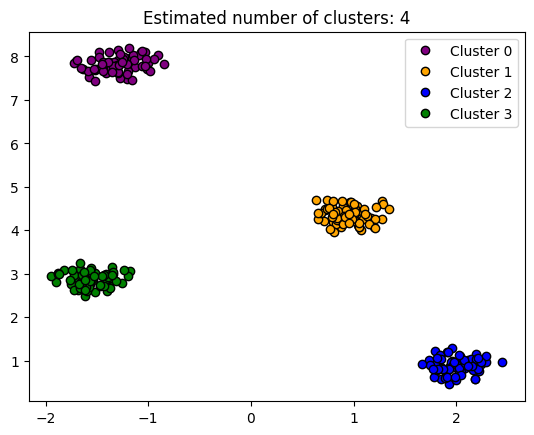

In [23]:
# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
# New colors scheme
colors = ['purple', 'orange', 'blue', 'green', 'cyan', 'magenta']
unique_labels = set(labels)

# Create a color map for unique labels
color_map = {label: color for label, color in zip(unique_labels, colors)}
print(color_map)

for label in unique_labels:
    if label == -1:
        # Black used for noise
        col = 'black'
    else:
        col = color_map[label]

    class_member_mask = (labels == label)

   # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6, label=f'Cluster {label}' if label != -1 else 'Noise')



plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.legend()
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [24]:
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.89
Adjusted Rand Index: 1.00


#**Well Done :)**